<a href="https://colab.research.google.com/github/mariellecortes/direcao_vento_por_localizacao/blob/main/find_wind_direction_by_location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json
import requests
import urllib.parse
import statistics
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
print("Digite o endereço completo(rua,número,bairro,cidade,cep) ao qual deseja consultar a direção do vento:")
address = input()

Digite o endereço completo(rua,número,bairro,cidade,cep) ao qual deseja consultar a direção do vento:
Av. Paulista, 1578 - Bela Vista, São Paulo - SP, 01310-200


In [3]:
url_openstreet = 'https://nominatim.openstreetmap.org/search/'+urllib.parse.quote(address)+'?format=json'

response_openstreet = requests.get(url_openstreet).json()
latitude = response_openstreet[0]["lat"]
longitude = response_openstreet[0]["lon"]

In [4]:
json_params = {"lat":latitude,
               "lon":longitude,
               "model": "gfs",
               "parameters":["wind"],
               "key":"Uy8avEITbo8LjzJa699WKcJOFiQ9BNDY"}

header = {"Content-Type" :"application/json"}
url_windy = 'https://api.windy.com/api/point-forecast/v2'
response_windy = requests.post(url_windy,json=json_params,headers=header )

wind_u = response_windy.json()["wind_u-surface"]
wind_u_avg = statistics.mean(wind_u)

wind_v = response_windy.json()["wind_v-surface"]
wind_v_avg = statistics.mean(wind_v)

vector = [wind_u_avg,wind_v_avg]
vector

[-1.3478682821131123, 0.9111752677999322]

In [5]:
def return_wind_direction(angle):
  wind_angle = {"N":0,"NNE":22.5,"NE":45,"ENE":67.5,"E":90,"ESE":112.5,"SE":135,"SSE":157.5,"S":180,\
                "SSW":202.5,"SW":225,"WSW":247.5,"W":270,"WNW":292.5,"NW":315,"NNW":337.5}

  if vector_angle >= wind_angle["N"] and vector_angle < wind_angle["NNE"]:
    wind_direction = "Vento NORTE"
  elif vector_angle >= wind_angle["NNE"] and vector_angle < wind_angle["NE"]:
    wind_direction = "Vento NOR-NORDESTE"
  elif vector_angle >= wind_angle["NE"] and vector_angle < wind_angle["ENE"]:
    wind_direction = "Vento NORDESTE"
  elif vector_angle >= wind_angle["ENE"] and vector_angle < wind_angle["E"]:
    wind_direction = "Vento LESTE-NORDESTE"
  elif vector_angle >= wind_angle["E"] and vector_angle < wind_angle["ESE"]:
    wind_direction = "Vento LESTE"
  elif vector_angle >= wind_angle["ESE"] and vector_angle < wind_angle["SE"]:
    wind_direction = "Vento LESTE-SUDESTE"
  elif vector_angle >= wind_angle["SE"] and vector_angle < wind_angle["SSE"]:
    wind_direction = "Vento SUDESTE"
  elif vector_angle >= wind_angle["SSE"] and vector_angle < wind_angle["S"]:
    wind_direction = "Vento SUL-SUDESTE"
  elif vector_angle >= wind_angle["S"] and vector_angle < wind_angle["SSW"]:
    wind_direction = "Vento SUL"
  elif vector_angle >= wind_angle["SSW"] and vector_angle < wind_angle["SW"]:
    wind_direction = "Vento SUL-SUDOESTE"
  elif vector_angle >= wind_angle["SW"] and vector_angle < wind_angle["WSW"]:
    wind_direction = "Vento SUDOESTE"
  elif vector_angle >= wind_angle["WSW"] and vector_angle < wind_angle["W"]:
    wind_direction = "Vento OESTE-SUDOESTE"
  elif vector_angle >= wind_angle["W"] and vector_angle < wind_angle["WNW"]:
    wind_direction = "Vento OESTE"
  elif vector_angle >= wind_angle["WNW"] and vector_angle < wind_angle["NW"]:
    wind_direction = "Vento OESTE-NOROESTE"
  elif vector_angle >= wind_angle["NW"] and vector_angle < wind_angle["NNW"]:
    wind_direction = "Vento NOROESTE"
  else:
    wind_direction = "Vento NOR-NOROESTE"

  return str(wind_direction)

Para essa localização há a incidência de Vento NOR-NOROESTE




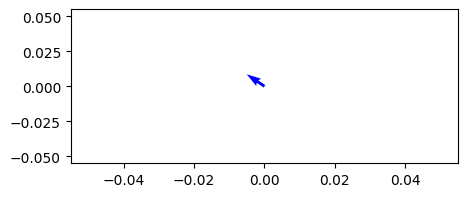

In [6]:
vector_angle = math.degrees(math.atan2(vector[:1][0],vector[1:][0]))
print(f"Para essa localização há a incidência de {return_wind_direction(vector_angle)}")
print("\n")
plt.figure(figsize=(5,2), dpi=100)
plt.quiver(0,0,vector[:1][0],vector[1:][0],color='b')